In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [4]:
import os 
import numpy as np
from PIL import Image
import tensorflow as tf
import time
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

In [5]:
model = VGG19(weights='imagenet', include_top=True)
layers = dict([(layer.name, layer.output) for layer in model.layers])

574717952/574710816 [==============================] - 5s 0us/step


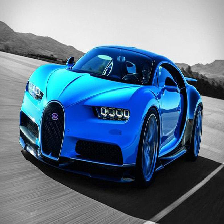

In [8]:
img_path = '/gdrive/My Drive/NesneTanima/2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
img

In [9]:
timeStart = int(round(time.time() * 1000))
preds = model.predict(x)
timeStop = int(round(time.time() * 1000))
decodePred = tf.keras.applications.vgg16.decode_predictions(preds, top=5)
print('predicted:', decodePred)
print(decodePred[0][0][1])
print("Time: ", str(timeStop- timeStart) + " ms")

predicted: [[('n04285008', 'sports_car', 0.55515784), ('n04037443', 'racer', 0.42615065), ('n02974003', 'car_wheel', 0.015796825), ('n03100240', 'convertible', 0.0011665742), ('n03930630', 'pickup', 0.00074079935)]]
sports_car
Time:  738 ms
